In [1]:
import requests
import json

r = requests.get("https://api.opendota.com/api/distributions")

with open('output.json', 'w') as out:
                json.dump(r.json(), out, sort_keys=True, indent='\t')

In [11]:
import requests
import json
import csv

response = requests.get("https://api.opendota.com/api/publicMatches?max_rank=40")
data = response.json()

with open('output.json', 'w') as out:
                json.dump(response.json(), out, sort_keys=True, indent='\t')


# Specify the path and name of the CSV file
csv_file = 'herald2crusader_5.csv'

# Extract the keys from the first item in the JSON response
fieldnames = list(data[0].keys())

# Write the data to the CSV file
with open(csv_file, 'w', newline='',encoding = 'utf8') as outfile:
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(data)

print("CSV file saved successfully!")

CSV file saved successfully!


In [16]:
import pandas as pd

# Load the combined_matches.csv file and the heroes.csv file
combined_matches = pd.read_csv(r'C:\Users\shakt\anaconda3\envs\info6105\Project\MatchData\combined_matchesa2i.csv')
heroes = pd.read_csv(r'C:\Users\shakt\anaconda3\envs\info6105\Project\Data2\heroes.csv')

# Convert the radiant_team column from a string representation to a list of hero IDs
combined_matches['radiant_team'] = combined_matches['radiant_team'].apply(lambda x: [int(hero_id) for hero_id in x.strip('[]').split(',')])

# Convert the dire_team column from a string representation to a list of hero IDs
combined_matches['dire_team'] = combined_matches['dire_team'].apply(lambda x: [int(hero_id) for hero_id in x.strip('[]').split(',')])

# # Create a dictionary to map hero IDs to their roles
hero_roles = dict(zip(heroes['id'], heroes['roles']))
for k,v in hero_roles.items():
    hero_roles[k] = eval(v)

# Define a function to count the roles for a given team
def count_roles(team):
    role_count = dict.fromkeys(['Carry', 'Disabler', 'Durable', 'Escape', 'Initiator', 'Jungler', 'Nuker', 'Pusher', 'Support'], 0)
    for hero_id in team:
        roles = hero_roles.get(hero_id, [])# Use .get() method to handle missing hero IDs
        if isinstance(roles, list):  # Check if roles is a list
            for role in roles:
                
                role_count[role] += 1
    return role_count

# # Apply the count_roles function to the radiant_team column and assign the results to a new column called radiant_team_roles
combined_matches['radiant_team_roles'] = combined_matches['radiant_team'].apply(count_roles)
print(combined_matches['radiant_team_roles'])
# # Apply the count_roles function to the dire_team column and assign the results to a new column called dire_team_roles
combined_matches['dire_team_roles'] = combined_matches['dire_team'].apply(count_roles)

# # Extract the role counts as separate columns for the radiant team
combined_matches[['r_carry', 'r_disabler', 'r_durable', 'r_escape', 'r_initiator', 'r_jungler', 'r_nuker', 'r_pusher', 'r_support']] = pd.DataFrame(combined_matches['radiant_team_roles'].tolist(), index=combined_matches.index)

# # Extract the role counts as separate columns for the dire team
combined_matches[['d_carry', 'd_disabler', 'd_durable', 'd_escape', 'd_initiator', 'd_jungler', 'd_nuker', 'd_pusher', 'd_support']] = pd.DataFrame(combined_matches['dire_team_roles'].tolist(), index=combined_matches.index)

# # Drop the radiant_team_roles and dire_team_roles columns
combined_matches.drop(['radiant_team_roles', 'dire_team_roles'], axis=1, inplace=True)

# # Save the updated combined_matches.csv file
combined_matches.to_csv('combined_matchesa2iroles.csv', index=False)

0       {'Carry': 3, 'Disabler': 2, 'Durable': 2, 'Esc...
1       {'Carry': 3, 'Disabler': 4, 'Durable': 3, 'Esc...
2       {'Carry': 4, 'Disabler': 2, 'Durable': 4, 'Esc...
3       {'Carry': 3, 'Disabler': 4, 'Durable': 2, 'Esc...
4       {'Carry': 3, 'Disabler': 2, 'Durable': 0, 'Esc...
                              ...                        
4995    {'Carry': 4, 'Disabler': 3, 'Durable': 3, 'Esc...
4996    {'Carry': 4, 'Disabler': 5, 'Durable': 3, 'Esc...
4997    {'Carry': 2, 'Disabler': 4, 'Durable': 2, 'Esc...
4998    {'Carry': 3, 'Disabler': 4, 'Durable': 1, 'Esc...
4999    {'Carry': 4, 'Disabler': 3, 'Durable': 2, 'Esc...
Name: radiant_team_roles, Length: 5000, dtype: object


diff_carry: 0.09235441445793334
diff_nuker: 0.23971614150317083
diff_support: 0.12896855577075622
diff_jungler: 0.0
diff_durable: 0.17468776207692013
diff_initiator: 0.06143364594686346
diff_escape: 0.18741088793885818
diff_disabler: 0.11542859230549783
Accuracy: 1.0


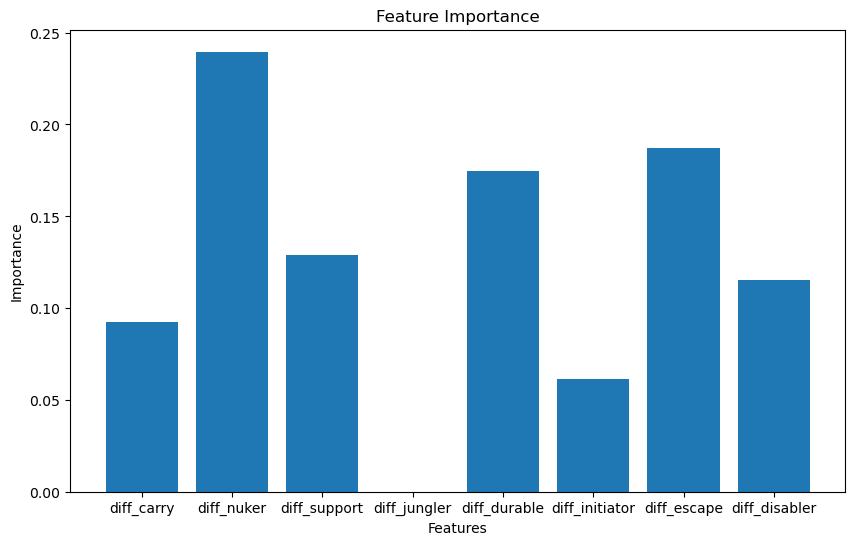

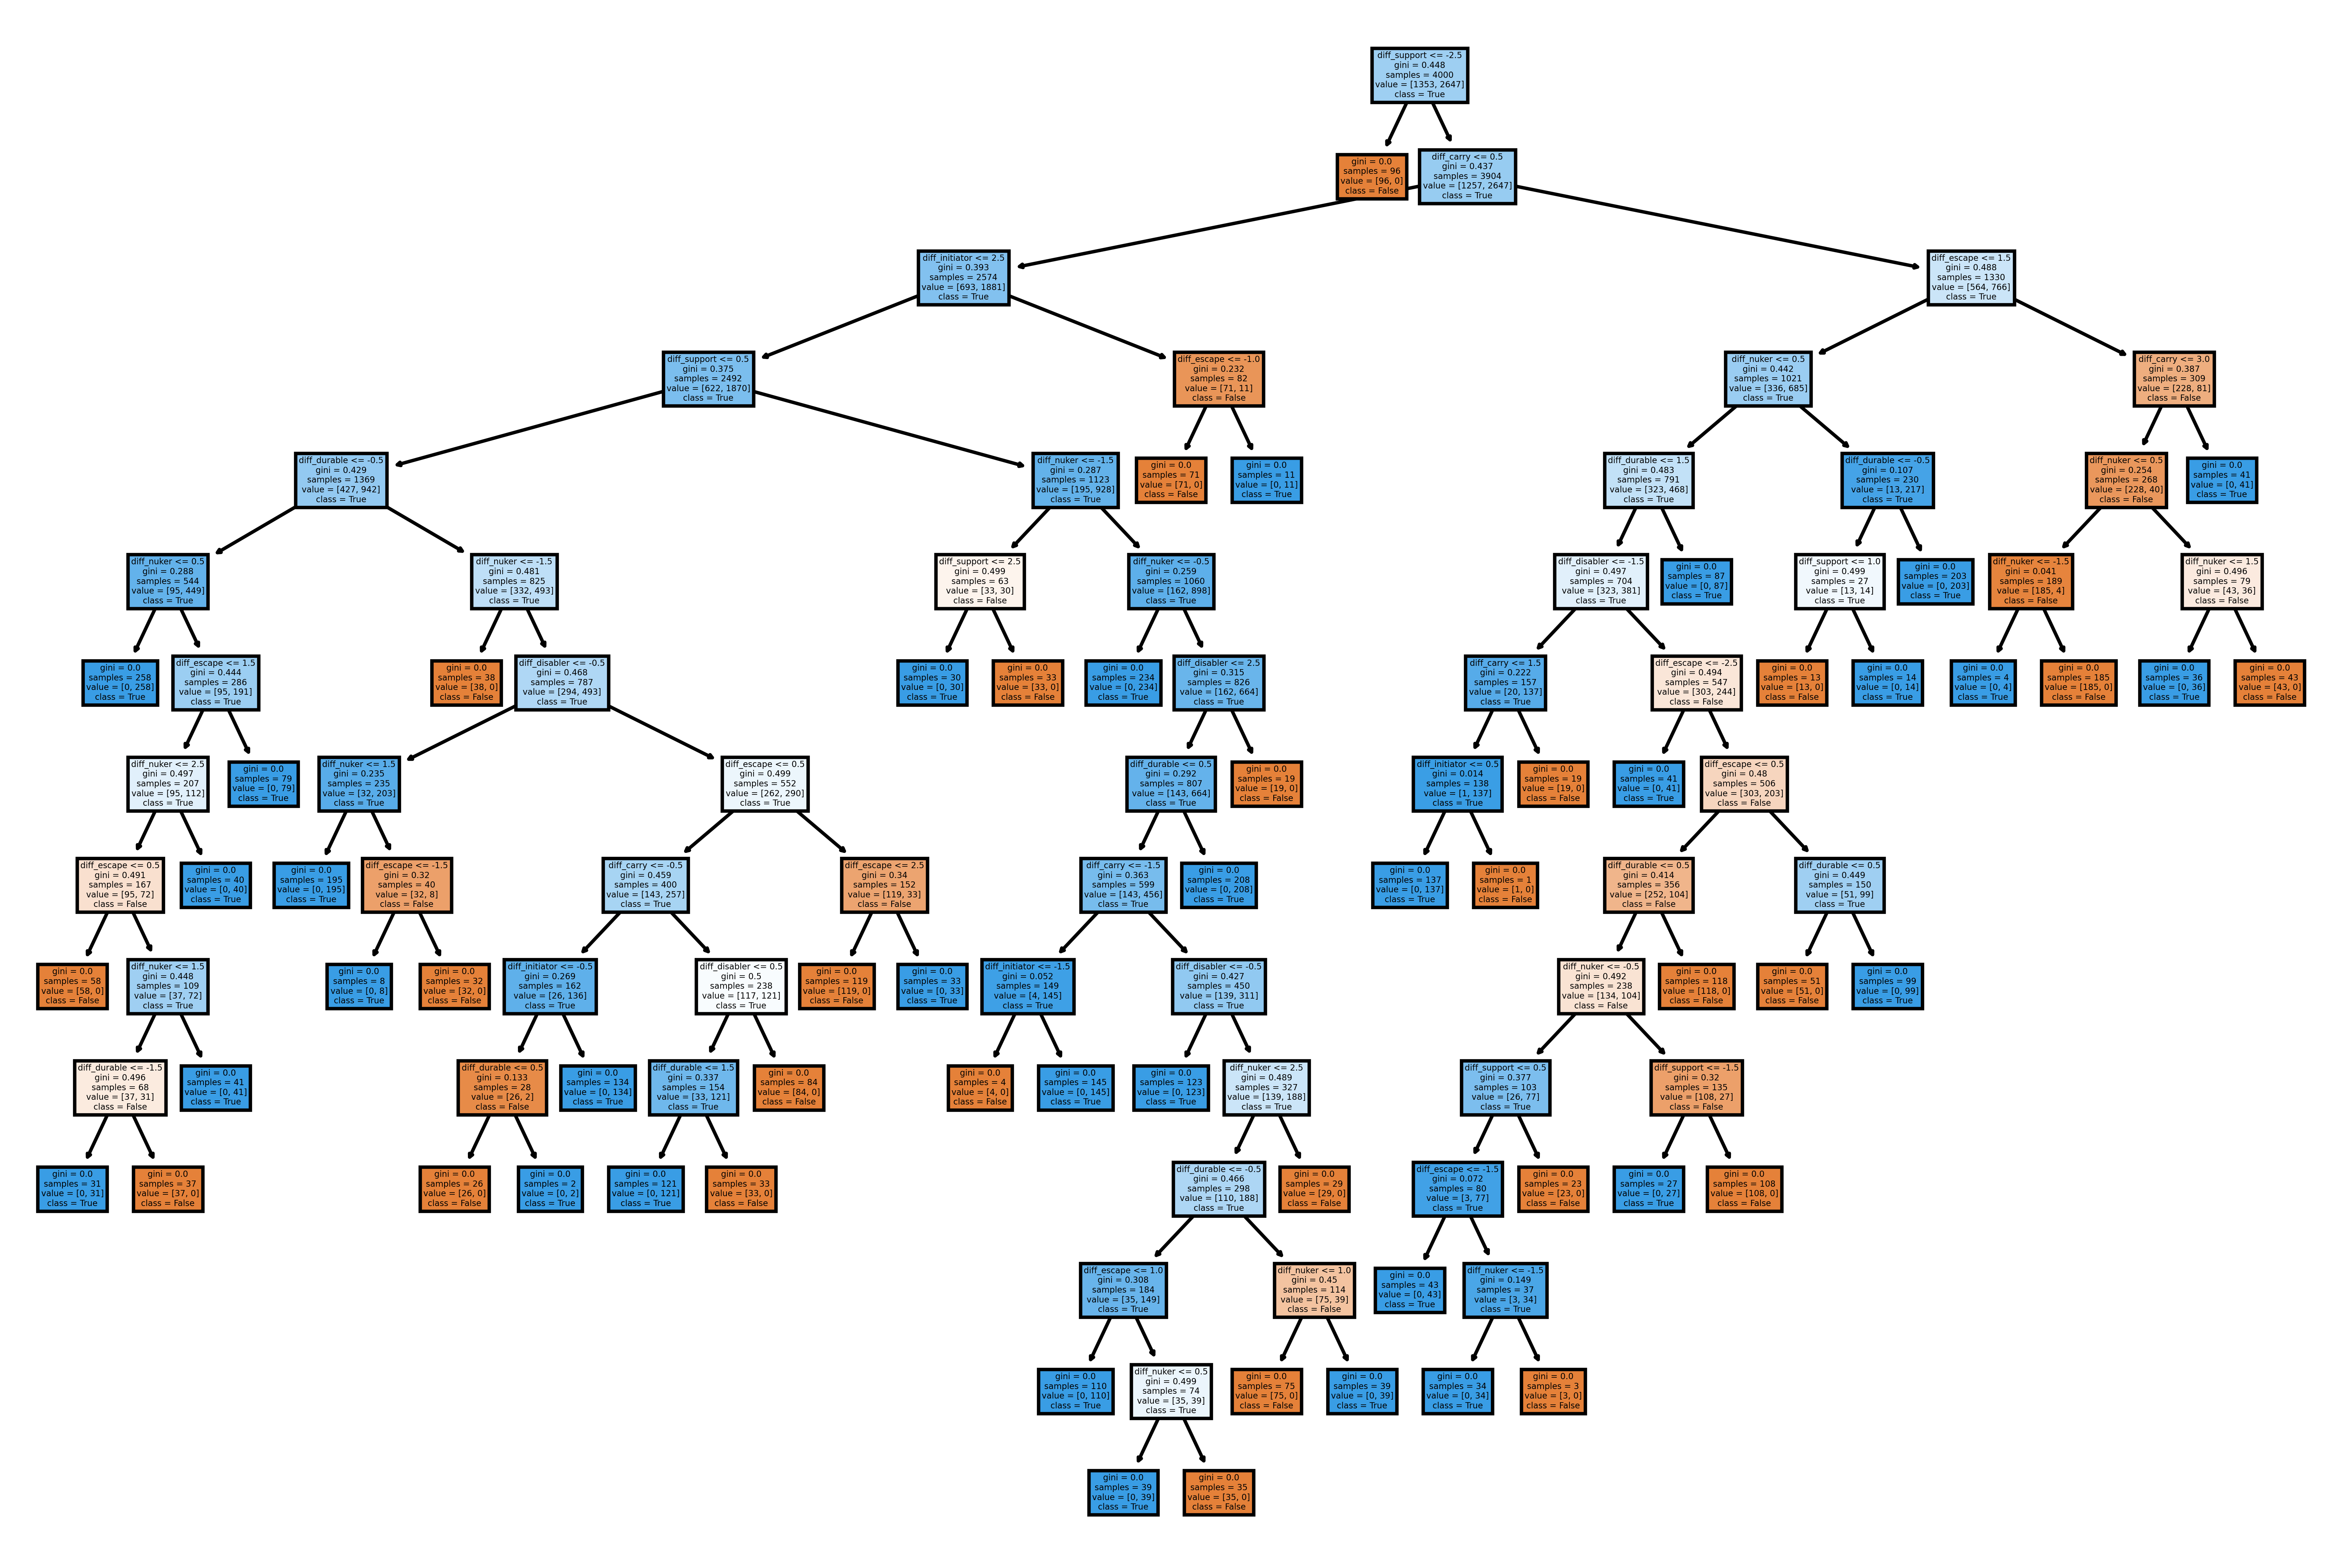

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Load the updated combined_matches1.csv file
combined_matches = pd.read_csv('combined_matches1.csv')

# Calculate the difference between radiant and dire roles
combined_matches['diff_carry'] = combined_matches['r_carry'] - combined_matches['d_carry']
combined_matches['diff_nuker'] = combined_matches['r_nuker'] - combined_matches['d_nuker']
combined_matches['diff_support'] = combined_matches['r_support'] - combined_matches['d_support']
combined_matches['diff_jungler'] = combined_matches['r_jungler'] - combined_matches['d_jungler']
combined_matches['diff_durable'] = combined_matches['r_durable'] - combined_matches['d_durable']
combined_matches['diff_initiator'] = combined_matches['r_initiator'] - combined_matches['d_initiator']
combined_matches['diff_escape'] = combined_matches['r_escape'] - combined_matches['d_escape']
combined_matches['diff_disabler'] = combined_matches['r_disabler'] - combined_matches['d_disabler']

# Split the data into X (features) and y (target variable)
X = combined_matches[['diff_carry', 'diff_nuker', 'diff_support', 'diff_jungler', 'diff_durable', 'diff_initiator', 'diff_escape', 'diff_disabler']]
y = combined_matches['radiant_win']

# Perform label encoding on the target variable
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Print the feature importances
importances = classifier.feature_importances_
features = X.columns

for feature, importance in zip(features, importances):
    print(f"{feature}: {importance}")

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Plot the decision tree
plt.figure(figsize=(12, 8), dpi=675)
plot_tree(classifier, feature_names=features, class_names=['False', 'True'], filled=True)
plt.show()

total_r_carry: 0.11008173901384294
total_r_nuker: 0.08773795216976818
total_r_support: 0.11419262527635886
total_r_jungler: 0.0
total_r_durable: 0.07805387303490621
total_r_initiator: 0.06499415452595883
total_r_escape: 0.03309060858083264
total_r_disabler: 0.06722612499261887
total_d_carry: 0.08466865213667472
total_d_nuker: 0.06213219694442907
total_d_support: 0.1124871717890257
total_d_jungler: 0.0
total_d_durable: 0.003210846363908393
total_d_initiator: 0.05618022449155779
total_d_escape: 0.018467308761594137
total_d_disabler: 0.10747652191852353
Accuracy: 1.0


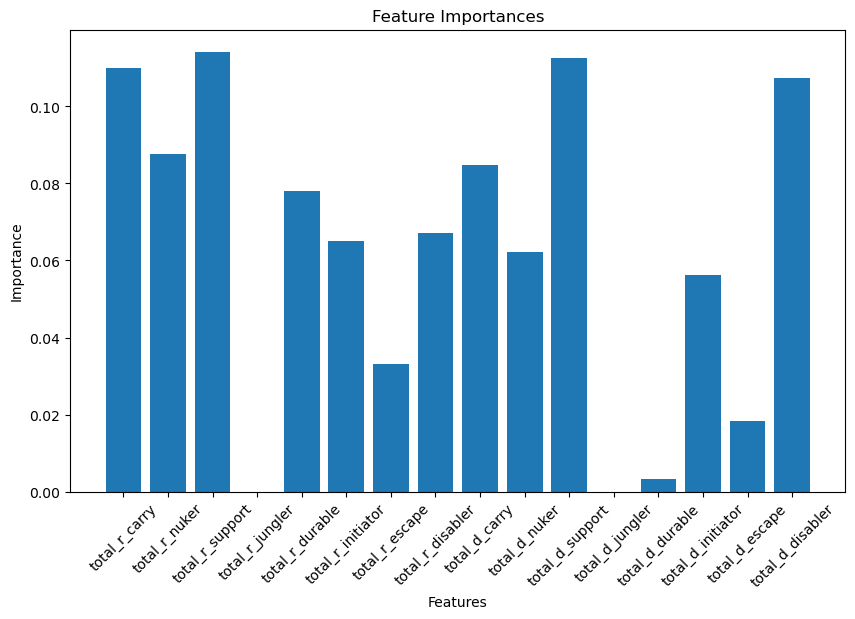

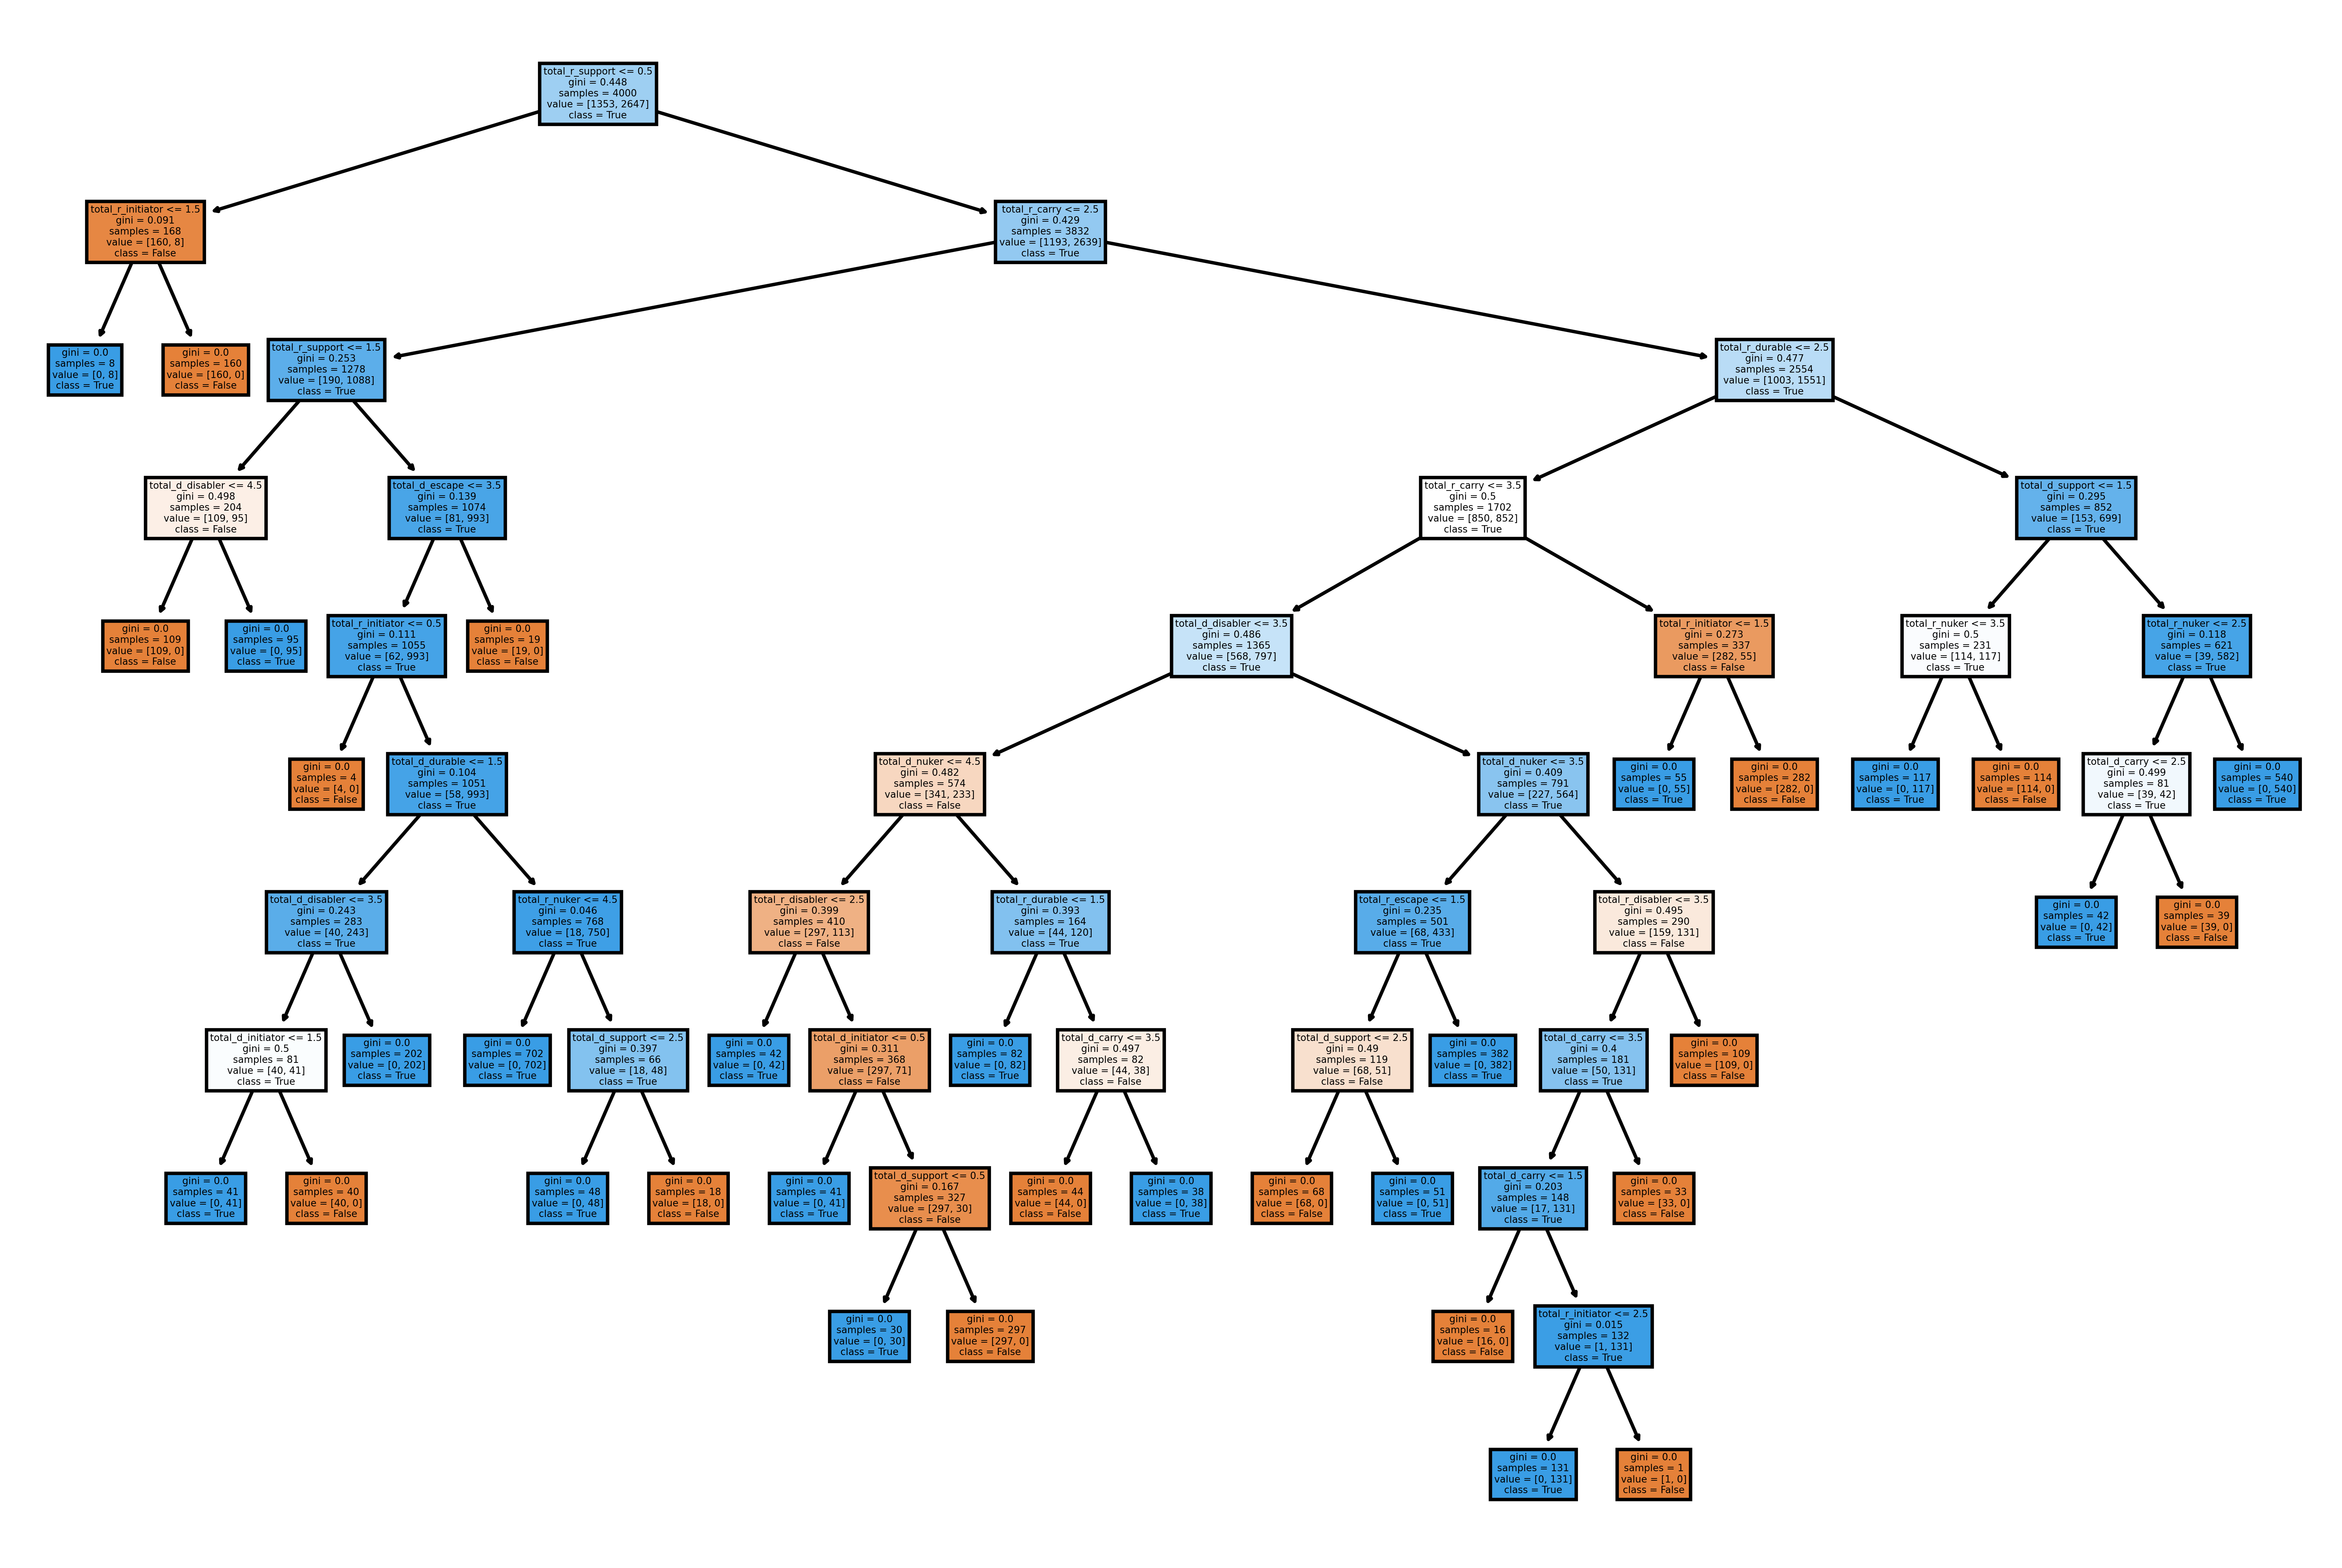

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Load the updated combined_matches1.csv file
combined_matches = pd.read_csv('combined_matches1.csv')

# Calculate the total number of radiant heroes in each role
combined_matches['total_r_carry'] = combined_matches['r_carry']
combined_matches['total_r_nuker'] = combined_matches['r_nuker']
combined_matches['total_r_support'] = combined_matches['r_support']
combined_matches['total_r_jungler'] = combined_matches['r_jungler']
combined_matches['total_r_durable'] = combined_matches['r_durable']
combined_matches['total_r_initiator'] = combined_matches['r_initiator']
combined_matches['total_r_escape'] = combined_matches['r_escape']
combined_matches['total_r_disabler'] = combined_matches['r_disabler']

# Calculate the total number of dire heroes in each role
combined_matches['total_d_carry'] = combined_matches['d_carry']
combined_matches['total_d_nuker'] = combined_matches['d_nuker']
combined_matches['total_d_support'] = combined_matches['d_support']
combined_matches['total_d_jungler'] = combined_matches['d_jungler']
combined_matches['total_d_durable'] = combined_matches['d_durable']
combined_matches['total_d_initiator'] = combined_matches['d_initiator']
combined_matches['total_d_escape'] = combined_matches['d_escape']
combined_matches['total_d_disabler'] = combined_matches['d_disabler']

# Split the data into X (features) and y (target variable)
X = combined_matches[['total_r_carry', 'total_r_nuker', 'total_r_support', 'total_r_jungler', 'total_r_durable', 'total_r_initiator', 'total_r_escape', 'total_r_disabler',
                     'total_d_carry', 'total_d_nuker', 'total_d_support', 'total_d_jungler', 'total_d_durable', 'total_d_initiator', 'total_d_escape', 'total_d_disabler']]
y = combined_matches['radiant_win']

# Perform label encoding on the target variable
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Print the feature importances
importances = classifier.feature_importances_
features = X.columns

for feature, importance in zip(features, importances):
    print(f"{feature}: {importance}")

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Plot the decision tree
plt.figure(figsize=(12, 8), dpi=675)
plot_tree(classifier, feature_names=features, class_names=['False', 'True'], filled=True)
plt.show()

r_carry: 0.11008173901384294
r_disabler: 0.03980162191413009
r_durable: 0.10066733644088105
r_jungler: 0.0
r_support: 0.11419262527635886
r_nuker: 0.11516245524825697
r_escape: 0.055676494592409954
r_support: 0.0
r_initiator: 0.06499415452595883
d_carry: 0.0
d_disabler: 0.13025006873587916
d_durable: 0.02167815512550253
d_jungler: 0.0
d_support: 0.058495943633022095
d_nuker: 0.07782986643080803
d_escape: 0.0
d_support: 0.07760277797736642
d_initiator: 0.03356676108558295
Accuracy: 1.0


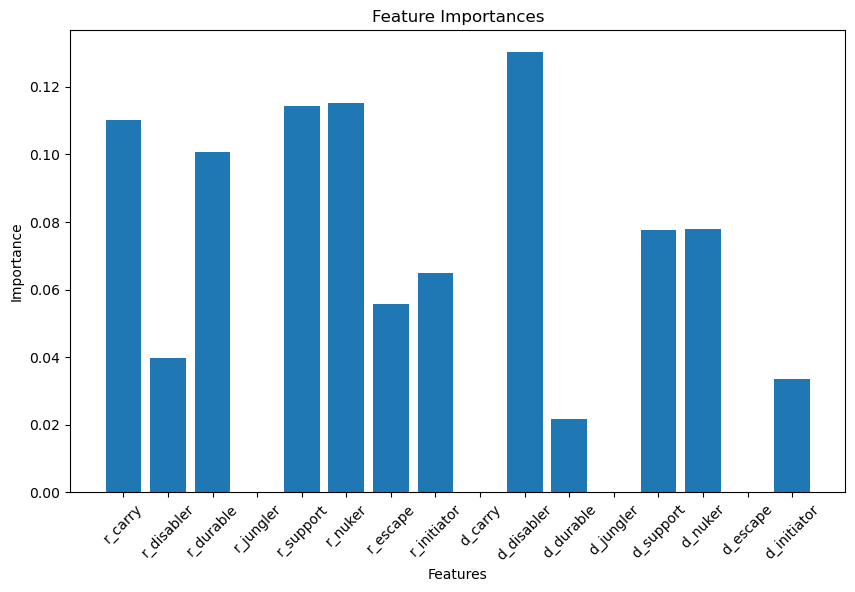

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing



X = combined_matches[['r_carry', 'r_disabler', 'r_durable', 'r_jungler', 'r_support', 'r_nuker', 'r_escape', 'r_support', 'r_initiator', 'd_carry', 'd_disabler', 'd_durable', 'd_jungler', 'd_support', 'd_nuker', 'd_escape', 'd_support', 'd_initiator']]
y = combined_matches['radiant_win']

# Perform label encoding on the target variable
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Print the feature importances
importances = classifier.feature_importances_
features = X.columns

for feature, importance in zip(features, importances):
    print(f"{feature}: {importance}")

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = classifier.score(X_test, y_test)
print("Accuracy:", accuracy)
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

{False: 0, True: 1}
total_r_carry: 0.11008173901384295
total_r_nuker: 0.0877379521697682
total_r_support: 0.1369661720937145
total_r_jungler: 0.0
total_r_durable: 0.07805387303490623
total_r_initiator: 0.06499415452595884
total_r_escape: 0.03309060858083264
total_r_disabler: 0.06722612499261887
total_d_carry: 0.03833326033893031
total_d_nuker: 0.07782986643080804
total_d_support: 0.11248717178902572
total_d_jungler: 0.0
total_d_durable: 0.021678155125502533
total_d_initiator: 0.056180224491557795
total_d_escape: 0.023611549821362817
total_d_disabler: 0.09172914759117054
Accuracy: 1.0


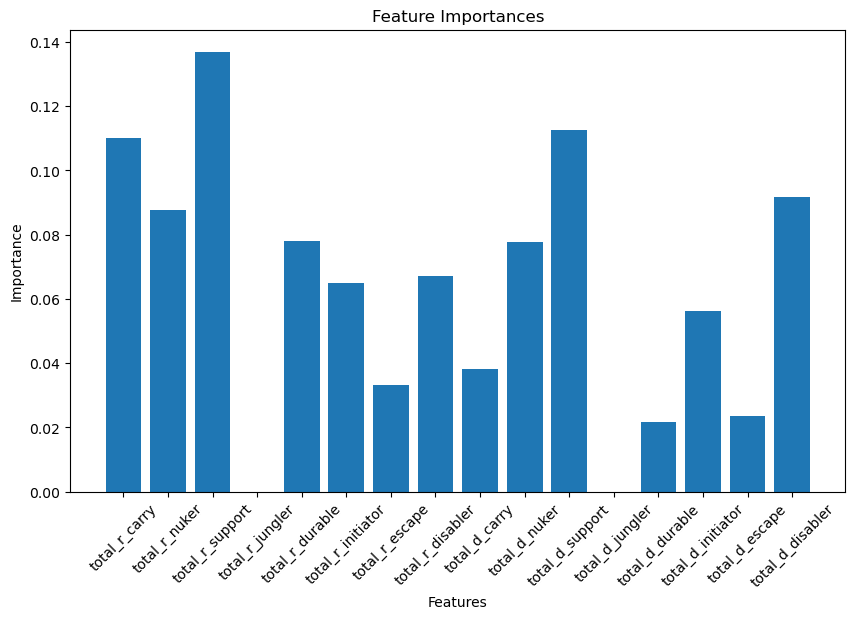

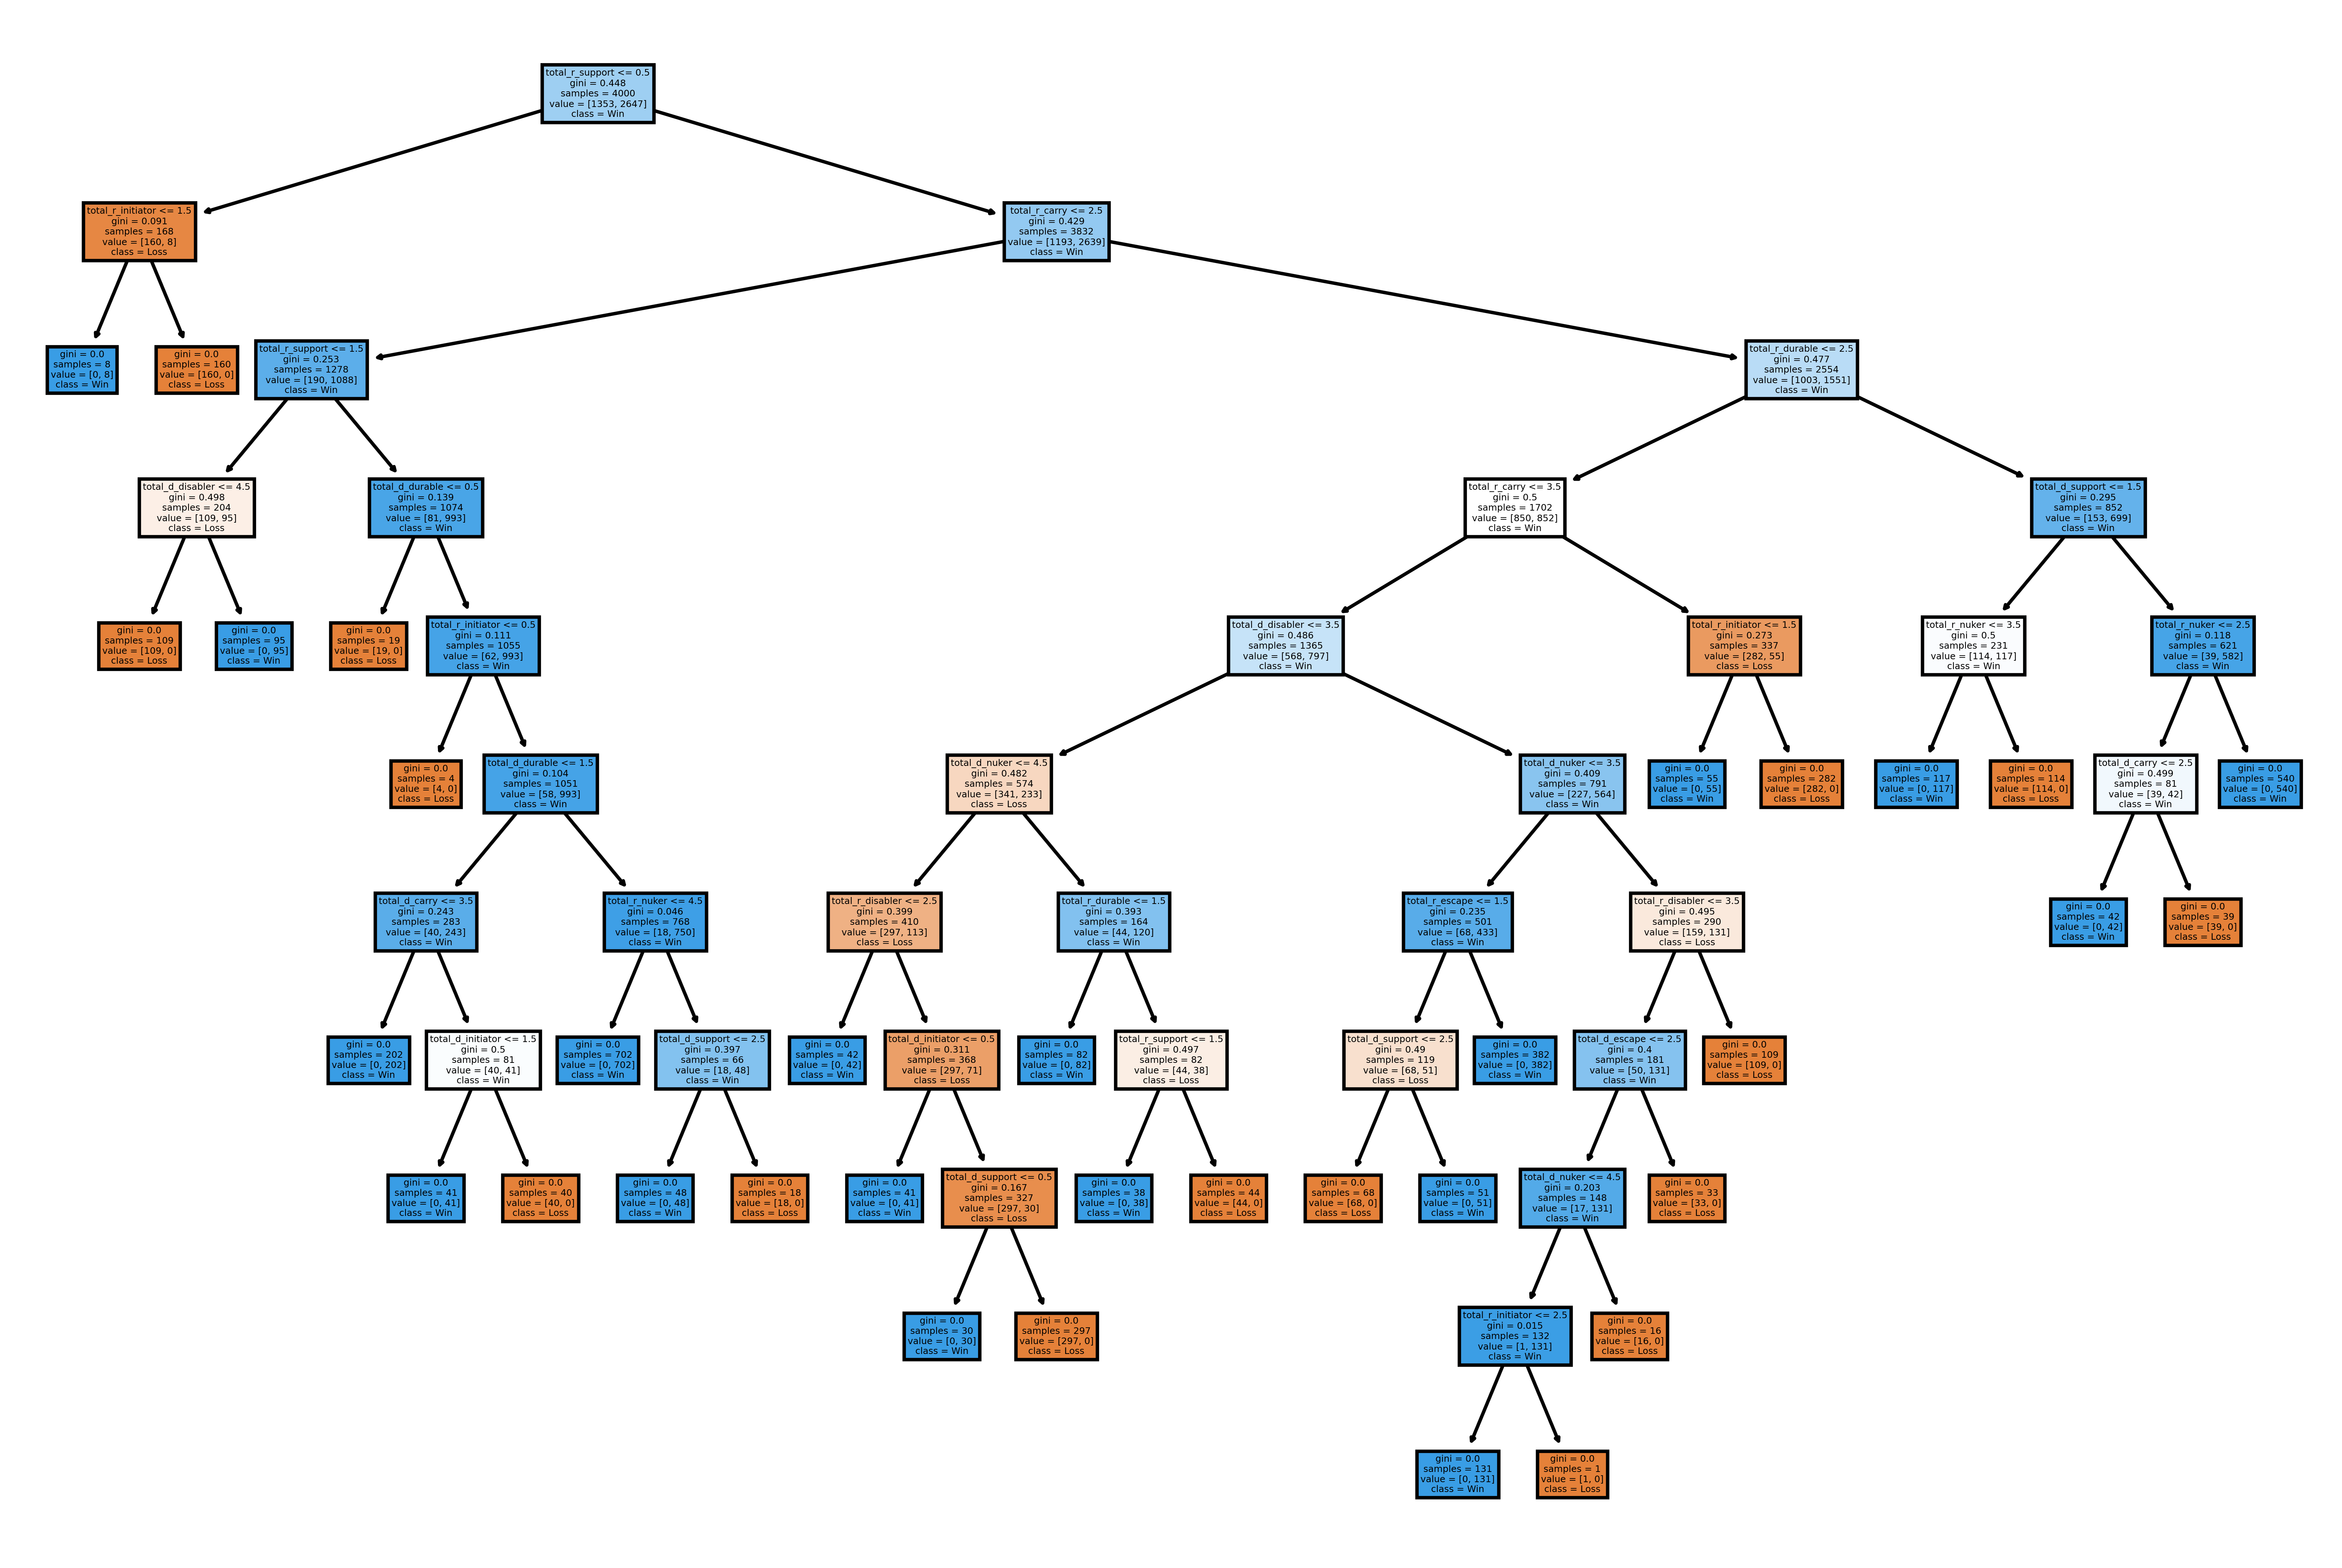

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Load the updated combined_matches1.csv file
combined_matches = pd.read_csv('combined_matches1.csv')

# Calculate the total number of radiant heroes in each role
combined_matches['total_r_carry'] = combined_matches['r_carry']
combined_matches['total_r_nuker'] = combined_matches['r_nuker']
combined_matches['total_r_support'] = combined_matches['r_support']
combined_matches['total_r_jungler'] = combined_matches['r_jungler']
combined_matches['total_r_durable'] = combined_matches['r_durable']
combined_matches['total_r_initiator'] = combined_matches['r_initiator']
combined_matches['total_r_escape'] = combined_matches['r_escape']
combined_matches['total_r_disabler'] = combined_matches['r_disabler']

# Calculate the total number of dire heroes in each role
combined_matches['total_d_carry'] = combined_matches['d_carry']
combined_matches['total_d_nuker'] = combined_matches['d_nuker']
combined_matches['total_d_support'] = combined_matches['d_support']
combined_matches['total_d_jungler'] = combined_matches['d_jungler']
combined_matches['total_d_durable'] = combined_matches['d_durable']
combined_matches['total_d_initiator'] = combined_matches['d_initiator']
combined_matches['total_d_escape'] = combined_matches['d_escape']
combined_matches['total_d_disabler'] = combined_matches['d_disabler']

# Split the data into X (features) and y (target variable)
X = combined_matches[['total_r_carry', 'total_r_nuker', 'total_r_support', 'total_r_jungler', 'total_r_durable', 'total_r_initiator', 'total_r_escape', 'total_r_disabler',
                     'total_d_carry', 'total_d_nuker', 'total_d_support', 'total_d_jungler', 'total_d_durable', 'total_d_initiator', 'total_d_escape', 'total_d_disabler']]
y = combined_matches['radiant_win']

# Perform label encoding on the target variable
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y)

# Print the mapping of categories to encoded values
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Print the feature importances
importances = classifier.feature_importances_
features = X.columns

for feature, importance in zip(features, importances):
    print(f"{feature}: {importance}")

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Inverse transform the predicted labels to get the original categories
y_pred_original = le.inverse_transform(y_pred)

# Evaluate the model
accuracy = classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Plot the decision tree
plt.figure(figsize=(12, 8), dpi=675)
plot_tree(classifier, feature_names=features, class_names=['Loss', 'Win'], filled=True)
plt.show()

total_r_carry: 0.17274176208730588
total_r_nuker: 0.12081602200940653
total_r_support: 0.16170133385067825
total_r_jungler: 0.0
total_r_durable: 0.09836188974089162
total_r_initiator: 0.09069789736735477
total_r_escape: 0.032410189112879524
total_r_disabler: 0.0
total_d_carry: 0.0057831050060285
total_d_nuker: 0.08482866254224197
total_d_support: 0.05251618676525516
total_d_jungler: 0.0
total_d_durable: 0.029784026692267696
total_d_initiator: 0.02272142887543141
total_d_escape: 0.0
total_d_disabler: 0.1276374959502587
Accuracy: 0.907


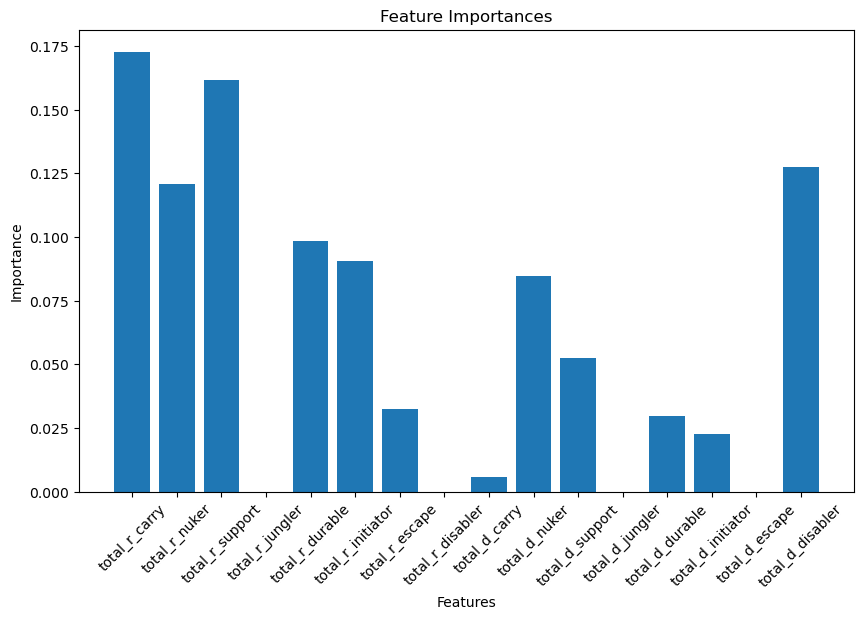

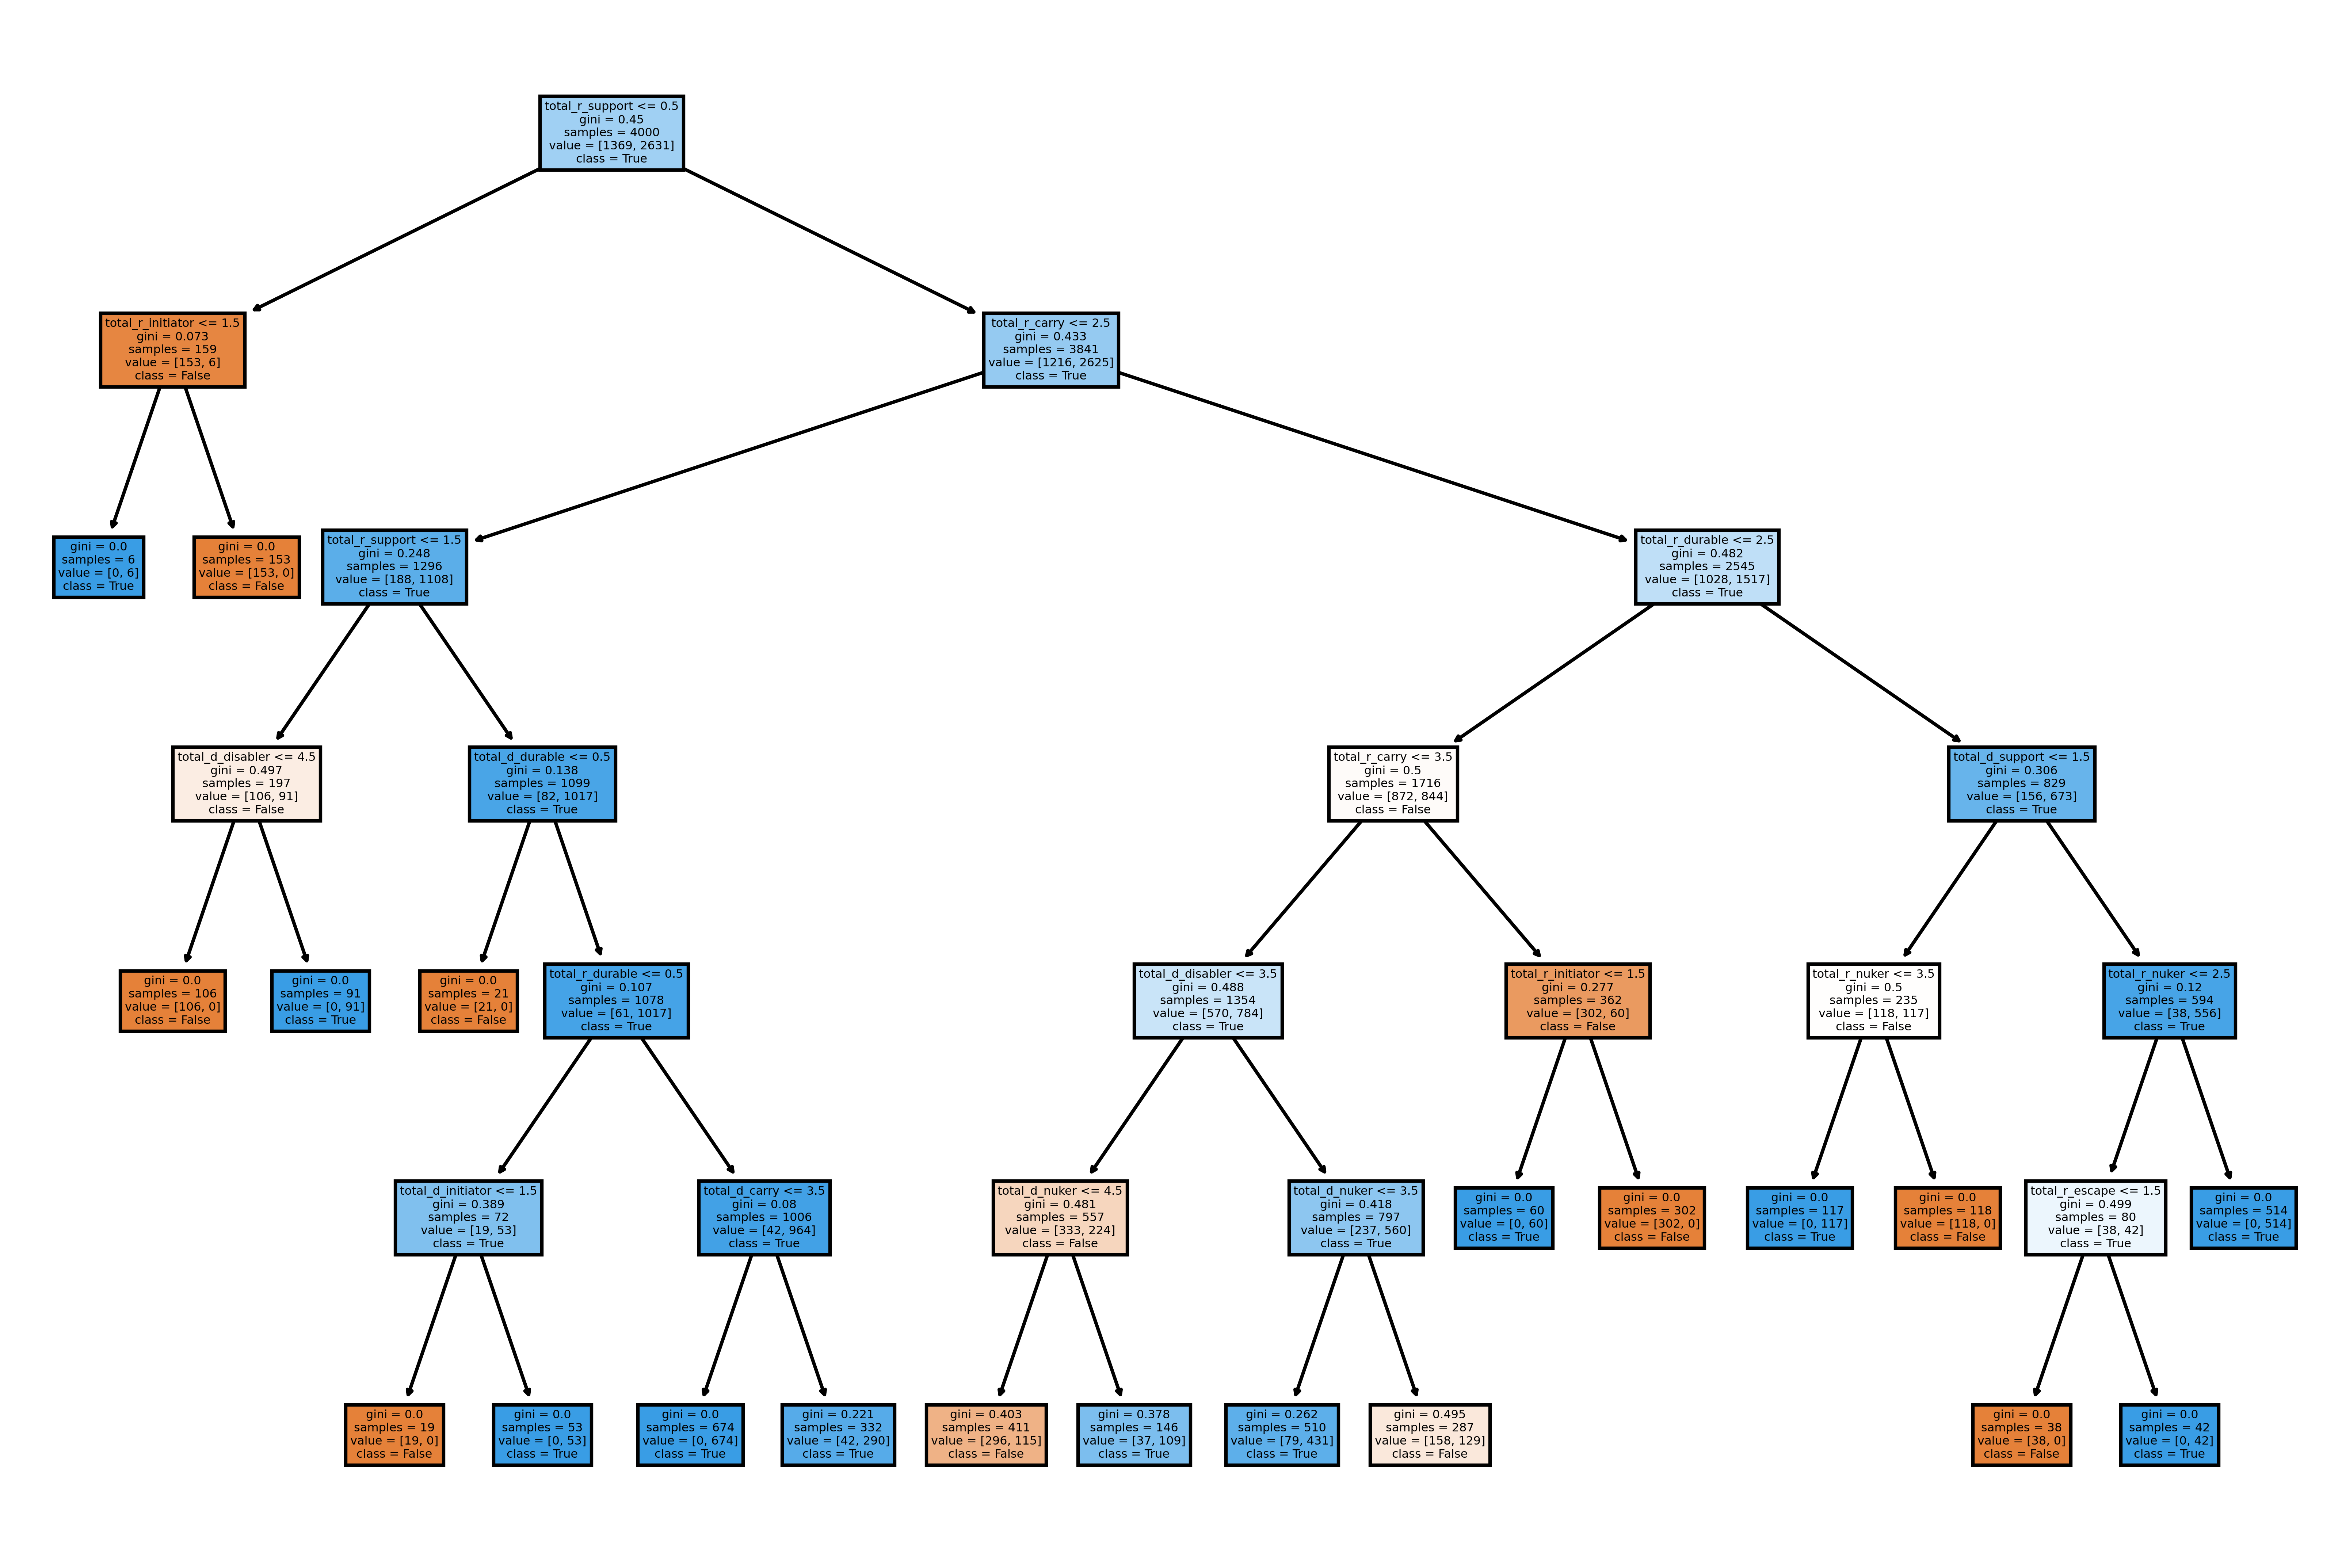

diff_carry: 0.09365900652768501
diff_nuker: 0.21928058082079568
diff_support: 0.25943811878964523
diff_jungler: 0.0
diff_durable: 0.05170449317541059
diff_initiator: 0.13047796626706265
diff_escape: 0.13567715808457406
diff_disabler: 0.10976267633482677
Accuracy: 0.798


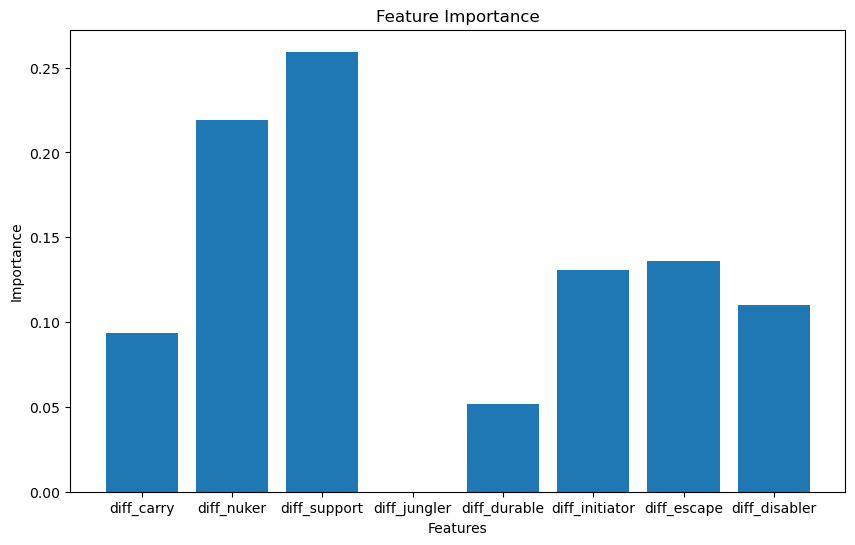

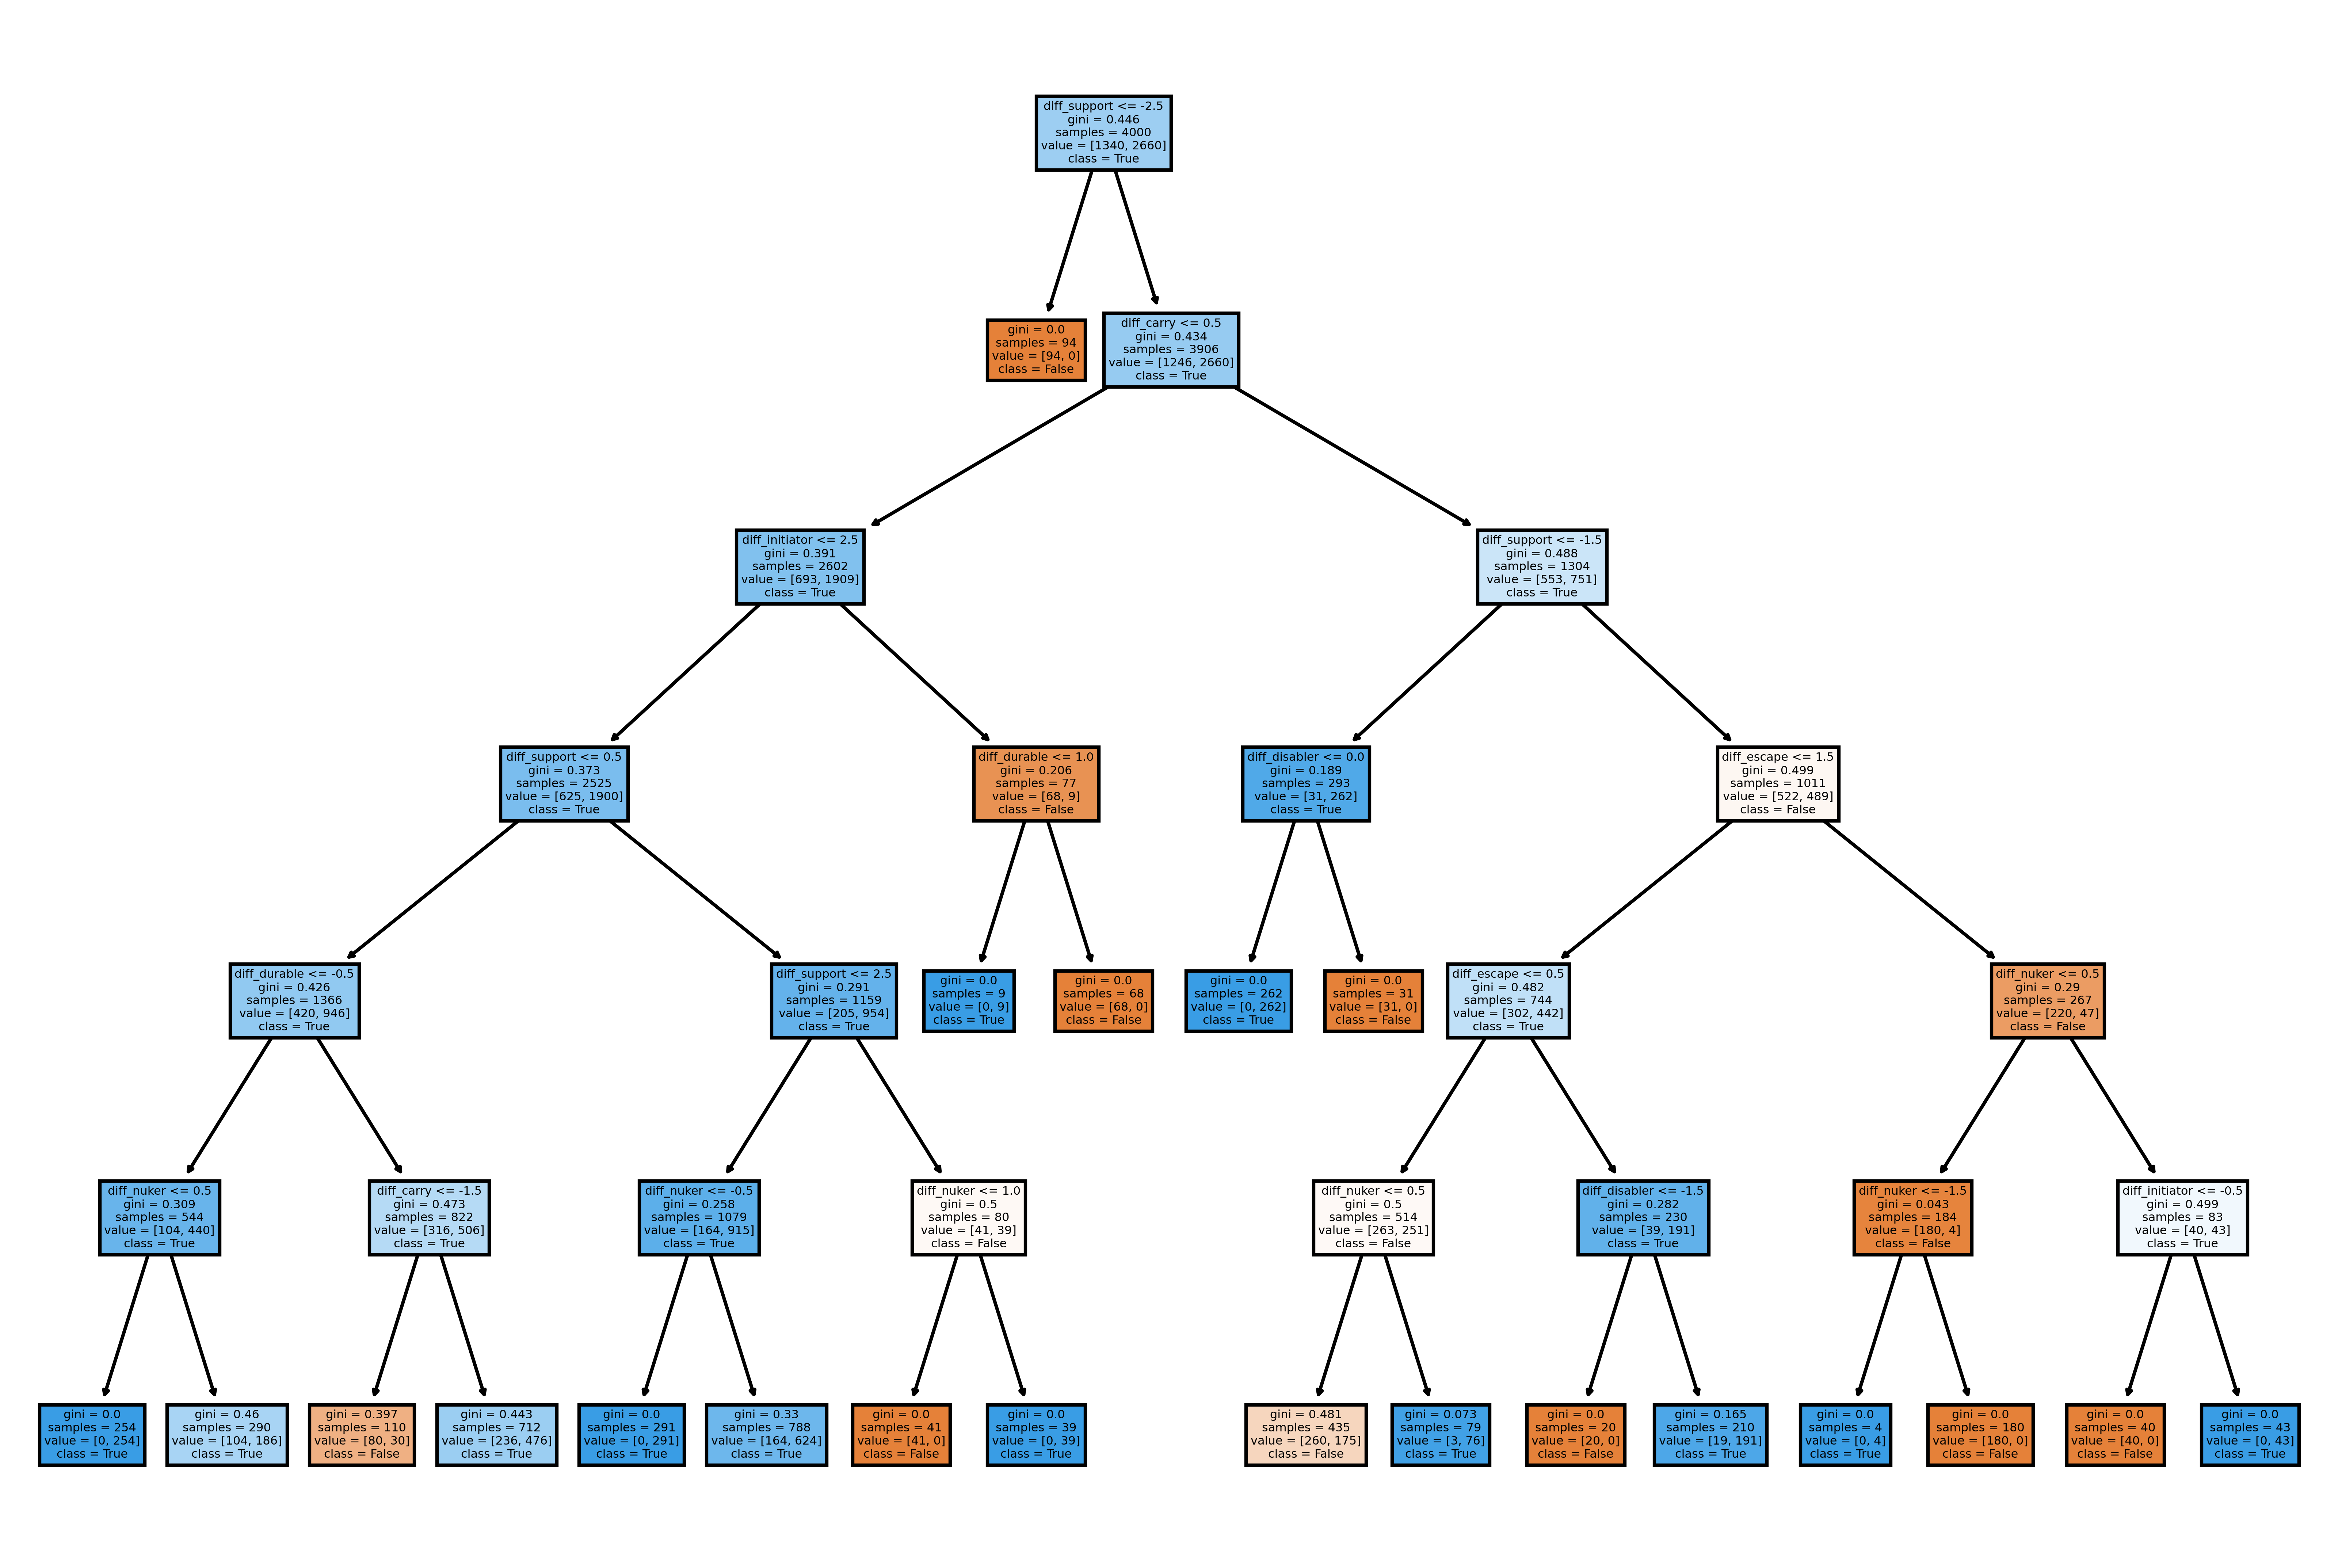

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Load the updated combined_matches1.csv file
combined_matches = pd.read_csv('combined_matches1.csv')

# Calculate the total number of radiant heroes in each role
combined_matches['total_r_carry'] = combined_matches['r_carry']
combined_matches['total_r_nuker'] = combined_matches['r_nuker']
combined_matches['total_r_support'] = combined_matches['r_support']
combined_matches['total_r_jungler'] = combined_matches['r_jungler']
combined_matches['total_r_durable'] = combined_matches['r_durable']
combined_matches['total_r_initiator'] = combined_matches['r_initiator']
combined_matches['total_r_escape'] = combined_matches['r_escape']
combined_matches['total_r_disabler'] = combined_matches['r_disabler']

# Calculate the total number of dire heroes in each role
combined_matches['total_d_carry'] = combined_matches['d_carry']
combined_matches['total_d_nuker'] = combined_matches['d_nuker']
combined_matches['total_d_support'] = combined_matches['d_support']
combined_matches['total_d_jungler'] = combined_matches['d_jungler']
combined_matches['total_d_durable'] = combined_matches['d_durable']
combined_matches['total_d_initiator'] = combined_matches['d_initiator']
combined_matches['total_d_escape'] = combined_matches['d_escape']
combined_matches['total_d_disabler'] = combined_matches['d_disabler']

# Split the data into X (features) and y (target variable)
X = combined_matches[['total_r_carry', 'total_r_nuker', 'total_r_support', 'total_r_jungler', 'total_r_durable', 'total_r_initiator', 'total_r_escape', 'total_r_disabler',
                     'total_d_carry', 'total_d_nuker', 'total_d_support', 'total_d_jungler', 'total_d_durable', 'total_d_initiator', 'total_d_escape', 'total_d_disabler']]
y = combined_matches['radiant_win']

# Perform label encoding on the target variable
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the decision tree classifier
classifier = DecisionTreeClassifier(max_depth=6)
classifier.fit(X_train, y_train)

# Print the feature importances
importances = classifier.feature_importances_
features = X.columns

for feature, importance in zip(features, importances):
    print(f"{feature}: {importance}")

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Plot the decision tree
plt.figure(figsize=(12, 8), dpi=675)
plot_tree(classifier, feature_names=features, class_names=['False', 'True'], filled=True)
plt.show()




combined_matches['diff_carry'] = combined_matches['r_carry'] - combined_matches['d_carry']
combined_matches['diff_nuker'] = combined_matches['r_nuker'] - combined_matches['d_nuker']
combined_matches['diff_support'] = combined_matches['r_support'] - combined_matches['d_support']
combined_matches['diff_jungler'] = combined_matches['r_jungler'] - combined_matches['d_jungler']
combined_matches['diff_durable'] = combined_matches['r_durable'] - combined_matches['d_durable']
combined_matches['diff_initiator'] = combined_matches['r_initiator'] - combined_matches['d_initiator']
combined_matches['diff_escape'] = combined_matches['r_escape'] - combined_matches['d_escape']
combined_matches['diff_disabler'] = combined_matches['r_disabler'] - combined_matches['d_disabler']

# Split the data into X (features) and y (target variable)
X = combined_matches[['diff_carry', 'diff_nuker', 'diff_support', 'diff_jungler', 'diff_durable', 'diff_initiator', 'diff_escape', 'diff_disabler']]
y = combined_matches['radiant_win']

# Perform label encoding on the target variable
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the decision tree classifier
classifier = DecisionTreeClassifier(max_depth=6,)
classifier.fit(X_train, y_train)

# Print the feature importances
importances = classifier.feature_importances_
features = X.columns

for feature, importance in zip(features, importances):
    print(f"{feature}: {importance}")

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Plot the decision tree
plt.figure(figsize=(12, 8), dpi=675)
plot_tree(classifier, feature_names=features, class_names=['False', 'True'], filled=True)
plt.show()